First of all we will do a model exploration in a base case (no policies implemented); <br/>
Next we will do a model exploration with random policies; <br/>
after a sensitivity and vulnerability analysis will be done; <br/>
at last a Optimization will be run to find optimal solutions. <br/>

# Model exploration

In [28]:
# initialize for this run
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter, Policy
from SALib.analyze import sobol
from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from dike_model_function import DikeNetwork
from ProblemFormulationSelf import problem_definition
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
dike_model, planning_steps = problem_definition('all vars')

policies_0 = [Policy('no policy', **{l.name: 0 for l in dike_model.levers})]
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_0 = evaluator.perform_experiments(scenarios = 1000, policies = policies_0)

save_results(all_results_0, './data/exp/nopol1000scen.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz


In [4]:
# Ensure variable is defined
try:
    all_results_0
except NameError:
    all_results_0 = None

# Test whether variable is defined to be None
if all_results_0 is None:
    all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
    experiments_0, outcomes_0 = all_results_0


[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz


### grand plot with all variables in it; Very unclear. 

In [9]:
sns.set(style="ticks", color_codes=True)
all_data_0 = pd.DataFrame.from_dict(outcomes_0)
sns.pairplot(data, vars=list(outcomes_0.keys()), diag_kind='hist')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa8e852a0d0> (for post_execute):


KeyboardInterrupt: 

### smaller plot; Way clearer. 

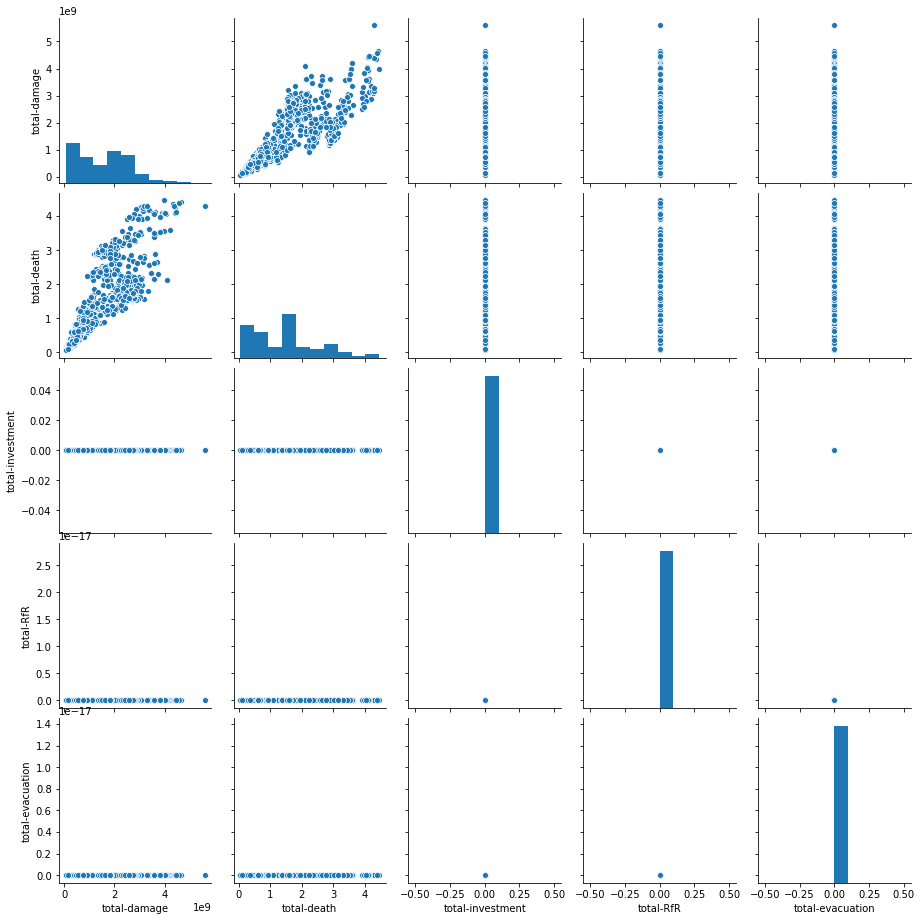

In [8]:
data = pd.DataFrame.from_dict(outcomes_0)

dam_list = data.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data['total-damage'] = data[dam_list].sum(axis=1)
data.drop(columns=dam_list, inplace=True)
death_list = data.filter(like='Deaths').columns
data['total-death'] = data[death_list].sum(axis=1)
data.drop(columns=death_list, inplace=True)
invest_list = data.filter(like='Investment').columns
data['total-investment'] = data[invest_list].sum(axis=1)
data.drop(columns=invest_list, inplace=True)
rfr_list = data.filter(like='RfR').columns
data['total-RfR'] = data[rfr_list].sum(axis=1)
data.drop(columns=rfr_list, inplace=True)
evac_list = data.filter(like='Evacuation').columns
data['total-evacuation'] = data[evac_list].sum(axis=1)
data.drop(columns=evac_list, inplace=True)

# new_outcomes = {col:np.array(data[col].tolist()) for col in data.columns} 
# print(data.head())
sns.pairplot(data, vars=list(data.columns), diag_kind='hist')
plt.show()

[MainProcess/INFO] no time dimension found in results


run with 10 ramdom policies

In [9]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_r10 = evaluator.perform_experiments(scenarios=10000,               #500
                                            policies=10,
                                            uncertainty_sampling='mc', reporting_interval=10000)

from ema_workbench import save_results

save_results(all_results_r10, './data/exp/mc10pol10000scen.tar.gz')

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.094582e+07,0.038356,2.727952e+07,0.027808,1.742046e+07,0.033337,1.054218e+07,0.005985,2.406315e+08,0.227915,0.0,0.0
1,2.195438e+08,0.125752,8.626318e+07,0.065485,5.439873e+07,0.079584,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
2,6.579547e+06,0.006079,4.313936e+08,0.480962,5.851649e+08,1.263215,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
3,2.205500e+09,1.726188,0.000000e+00,0.000000,7.482219e+07,0.147622,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
4,8.789173e+07,0.093068,8.718292e+07,0.120338,3.829385e+07,0.101135,0.000000e+00,0.000000,5.967699e+08,0.769028,0.0,0.0


In [22]:
try:
    all_results_r10
except NameError:
    all_results_r10 = None

# Test whether variable is defined to be None
if all_results_10 is None:
    all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
    experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/mc10pol10000scen.tar.gz


In [23]:
data_r10 = pd.DataFrame.from_dict(outcomes_r10)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Investment').columns
data_r10['total-investment'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)
rfr_list = data_r10.filter(like='RfR').columns
data_r10['total-RfR'] = data_r10[rfr_list].sum(axis=1)
data_r10.drop(columns=rfr_list, inplace=True)
evac_list = data_r10.filter(like='Evacuation').columns
data_r10['total-evacuation'] = data_r10[evac_list].sum(axis=1)
data_r10.drop(columns=evac_list, inplace=True)


In [32]:
# TODO @Hongxuan please see this weird as problem. You have to run an empty cell to make it show something ;PPP
from ema_workbench.analysis import pairs_plotting

new_outcomes_r10 = {col:np.array(data_r10[col].tolist()) for col in data.columns}
fig, ax = pairs_plotting.pairs_scatter(experiments_r10, new_outcomes_r10, group_by='policy', legend=True)
fig.set_size_inches([12, 12])

[MainProcess/INFO] no time dimension found in results


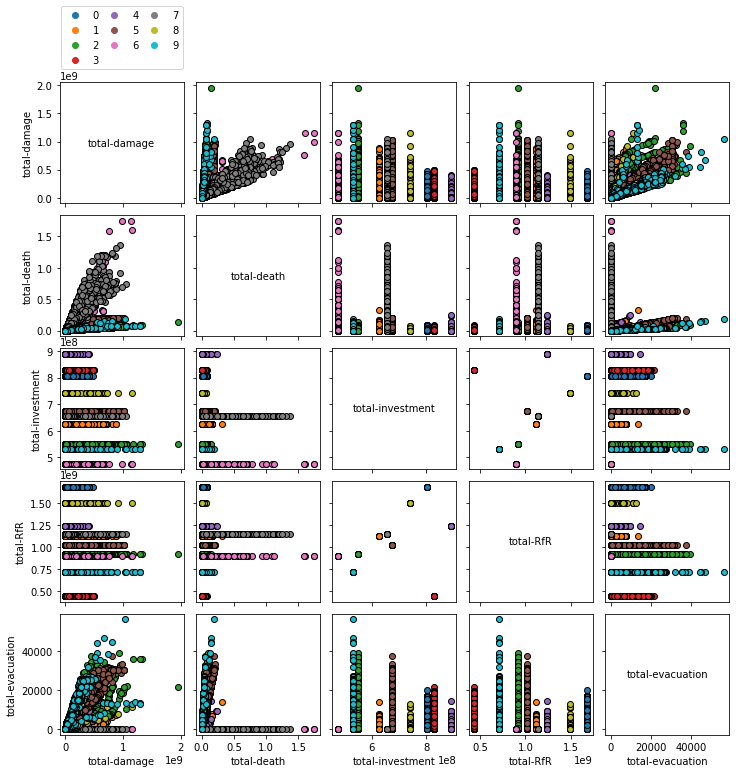

In [29]:
# run this to see picture of the above

<ipython-input-31-8238f678f0ee>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = plt.subplot(223)


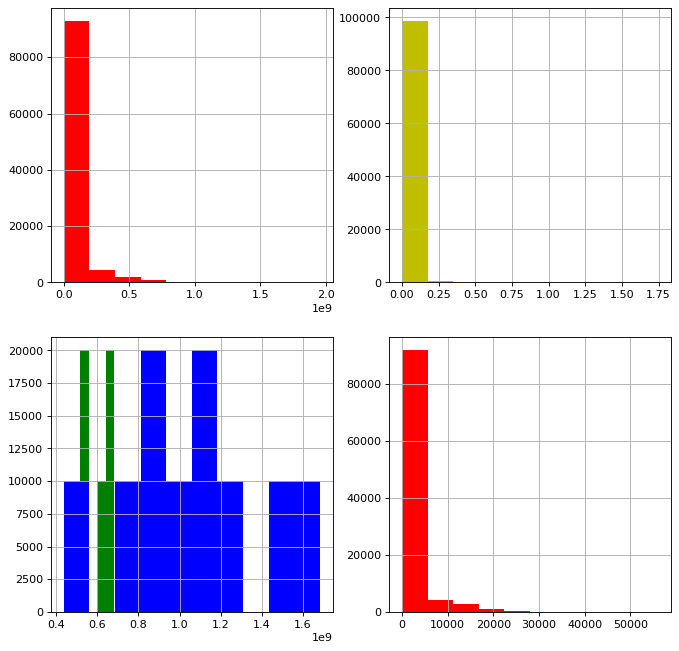

In [31]:
import matplotlib.pyplot as plt # TO DO; plot the scalers.

plt.figure(figsize=(10,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
data_r10['total-damage'].hist(color="r")
ax2 = plt.subplot(222)
data_r10['total-death'].hist(color="y")
ax3 = plt.subplot(223)
data_r10['total-investment'].hist(color="g")
ax4 = plt.subplot(223)
data_r10['total-RfR'].hist(color="b")
ax5 = plt.subplot(224)
data_r10['total-evacuation'].hist(color="r")

# Vulnerability & sensitivity Analysis

### scenario discovery


In [2]:
# Ensure variable is defined
try:
    all_results_0
except NameError:
    all_results_0 = None

# Test whether variable is defined to be None
if all_results_0 is None:
    all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
    experiments_0, outcomes_0 = all_results_0

try:
    all_results_r10
except NameError:
    all_results_r10 = None

# Test whether variable is defined to be None
if all_results_r10 is None:
    all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
    experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from c:\TEMP\Programming\EPA1361\final assignment\data\exp\nopol1000scen.tar.gz
[MainProcess/INFO] results loaded succesfully from c:\TEMP\Programming\EPA1361\final assignment\data\exp\mc10pol10000scen.tar.gz


In [3]:
data_0 = pd.DataFrame.from_dict(outcomes_0)

dam_list = data_0.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_0['total-damage'] = data_0[dam_list].sum(axis=1)
data_0.drop(columns=dam_list, inplace=True)
death_list = data_0.filter(like='Deaths').columns
data_0['total-death'] = data_0[death_list].sum(axis=1)
data_0.drop(columns=death_list, inplace=True)
invest_list = data_0.filter(like='Costs').columns
data_0.drop(columns=invest_list, inplace=True)


data_r10 = pd.DataFrame.from_dict(outcomes_r10)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Costs').columns
data_r10['total-cost'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)

In [4]:
print("total deahts no pols mean: "+str(data_0['total-death'].mean()))
print("total damage no pols mean: "+str(data_0['total-damage'].mean()))
print("total deaths 10 random pols mean: "+str(data_r10['total-death'].mean()))
print("total damage 10 random pols mean: "+str(data_r10['total-damage'].mean()))
print("total costs 10 random pols mean: "+str(data_r10['total-cost'].mean()))

print("total deaths no pols greater than 1: "+str(np.sum(data_0['total-death']>1)))
print("total damage no pols greater than 1B: "+str(np.sum(data_0['total-damage']>1000000000)))
print("total deaths 10 random pols greater than 0.05: "+str(np.sum(data_r10['total-death']>0.001)))
print("total damage 10 random pols greater than 1B: "+str(np.sum(data_r10['total-damage']>4000000)))
print("total cost 10 random pols greater than 1.6B: "+str(np.sum(data_r10['total-cost']>1600000000)))

total deahts no pols mean: 1.4966618578082576
total damage no pols mean: 1538255217.3632505
total deaths 10 random pols mean: 0.01616832650721995
total damage 10 random pols mean: 46749830.328865625
total costs 10 random pols mean: 1742717452.0047443
total deaths no pols greater than 1: 622
total damage no pols greater than 1B: 616
total deaths 10 random pols greater than 0.05: 57986
total damage 10 random pols greater than 1B: 59689
total cost 10 random pols greater than 1.6B: 60000


In [6]:
x_0 =  experiments_0.iloc[:, 0: 48]
y_death_0 = data_0['total-death'] > 1
y_damage_0 = data_0['total-damage']>1000000000

x_r10 =  experiments_r10.iloc[:, 0: 48]
y_death_r10 = data_r10['total-death'] > 0.001
y_damage_r10 = data_r10['total-damage']>4000000
y_cost_r10 = data_r10['total-cost']>1600000000

[MainProcess/INFO] 1000 points remaining, containing 622 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.28, coverage: 0.45016077170418006, density: 1.0 restricted_dimensions: 2


<function matplotlib.pyplot.show(*args, **kw)>

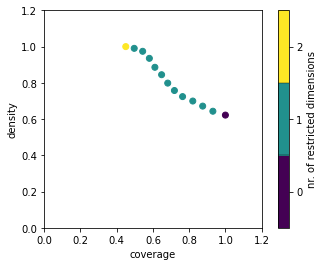

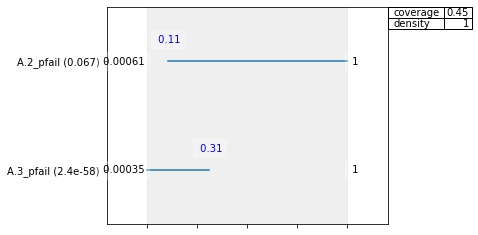

In [10]:
prim_death_0 = prim.Prim(x_0, y_death_0, threshold=0.3, peel_alpha=0.1)
box_death_0 = prim_death_0.find_box()

box_death_0.show_tradeoff()
box_death_0.inspect(style='graph')

plt.show

In [20]:
box_death_0.inspect_tradeoff()

alt.VConcatChart(...)

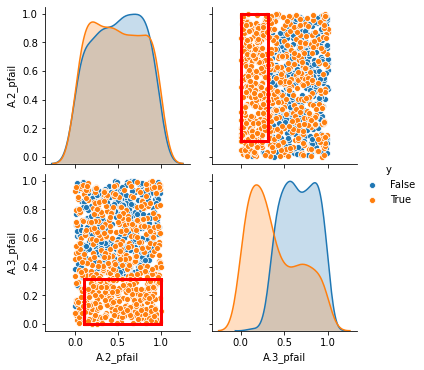

In [22]:
box_death_0.show_pairs_scatter()
plt.show()

[MainProcess/INFO] 1000 points remaining, containing 616 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.386, coverage: 0.6266233766233766, density: 1.0 restricted_dimensions: 1


<function matplotlib.pyplot.show(*args, **kw)>

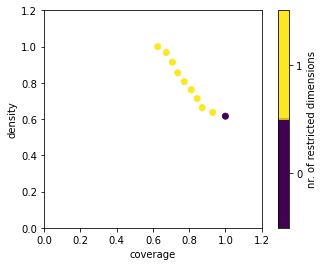

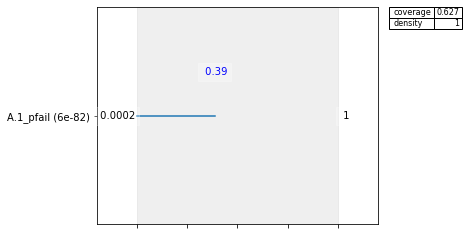

In [11]:
prim_damage_0 = prim.Prim(x_0, y_damage_0, threshold=0.3, peel_alpha=0.1)
box_damage_0 = prim_damage_0.find_box()

box_damage_0.show_tradeoff()
box_damage_0.inspect(style='graph')

plt.show

In [19]:
box_damage_0.inspect_tradeoff()

alt.VConcatChart(...)

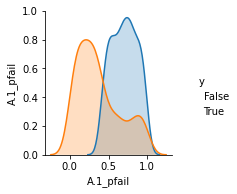

In [24]:
box_damage_0.show_pairs_scatter()
plt.show()

[MainProcess/INFO] 100000 points remaining, containing 57986 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0846, coverage: 0.14589728555168488, density: 1.0 restricted_dimensions: 7


<function matplotlib.pyplot.show(*args, **kw)>

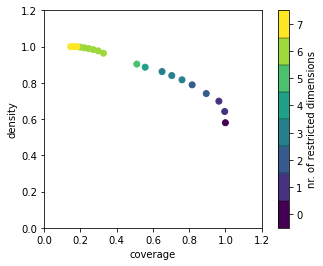

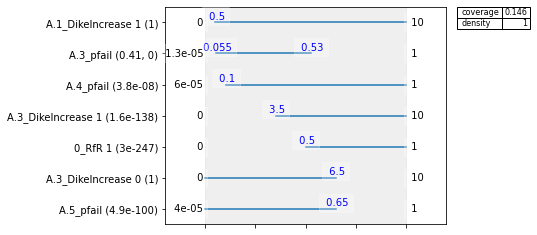

In [12]:
prim_death_r10 = prim.Prim(x_r10, y_death_r10, threshold=0.3, peel_alpha=0.1)
box_death_r10 = prim_death_r10.find_box()

box_death_r10.show_tradeoff()
box_death_r10.inspect(style='graph')

plt.show

In [18]:
box_death_r10.inspect_tradeoff()

alt.VConcatChart(...)

In [34]:
box_death_r10.show_pairs_scatter()
plt.show()

KeyboardInterrupt: 

[MainProcess/INFO] 100000 points remaining, containing 59689 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.06165, coverage: 0.10328536246209519, density: 1.0 restricted_dimensions: 5


<function matplotlib.pyplot.show(*args, **kw)>

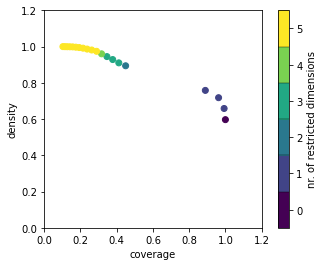

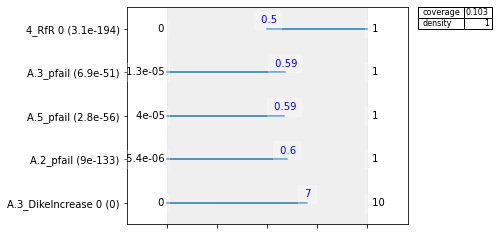

In [14]:
prim_damage_r10 = prim.Prim(x_r10, y_damage_r10, threshold=0.3, peel_alpha=0.1)
box_damage_r10 = prim_damage_r10.find_box()

box_damage_r10.show_tradeoff()
box_damage_r10.inspect(style='graph')

plt.show

In [17]:
box_damage_r10.inspect_tradeoff()

alt.VConcatChart(...)

In [ ]:
box_damage_r10.show_pairs_scatter()
plt.show()

[MainProcess/INFO] 100000 points remaining, containing 60000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.5, coverage: 0.8333333333333334, density: 1.0 restricted_dimensions: 1


<function matplotlib.pyplot.show(*args, **kw)>

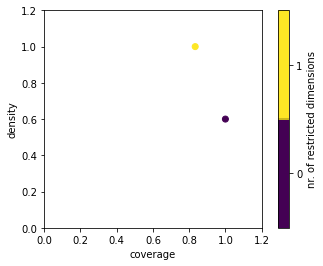

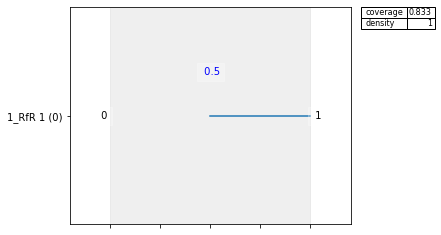

In [15]:
prim_cost_r10 = prim.Prim(x_r10, y_cost_r10, threshold=0.3, peel_alpha=0.1)
box_cost_r10 = prim_cost_r10.find_box()

box_cost_r10.show_tradeoff()
box_cost_r10.inspect(style='graph')

plt.show

In [16]:
box_cost_r10.inspect_tradeoff()

alt.VConcatChart(...)

In [ ]:
box_cost_r10.show_pairs_scatter()
plt.show()

### dimensional stacking

In [30]:
x_0 = experiments_0.drop(['scenario','policy'], axis = 1, inplace = False)
x_r10 = experiments_r10.drop(['scenario','policy'], axis = 1, inplace = False)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


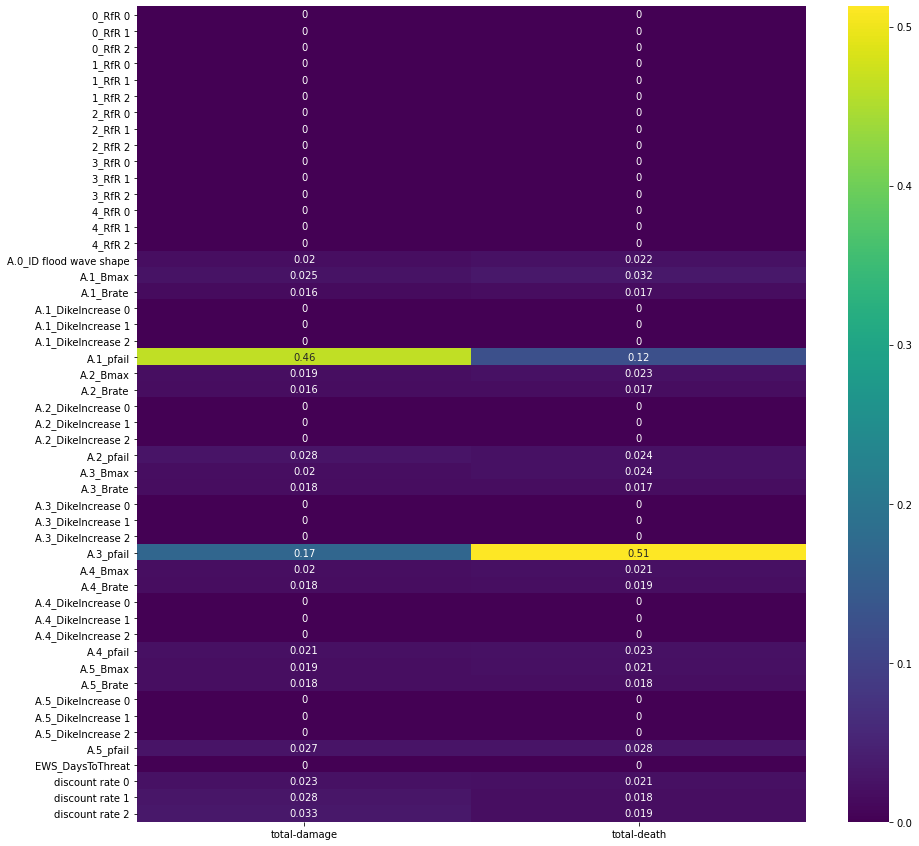

In [32]:
fs_0 = feature_scoring.get_feature_scores_all(x_0, data_0)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(fs_0, cmap='viridis', annot=True)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


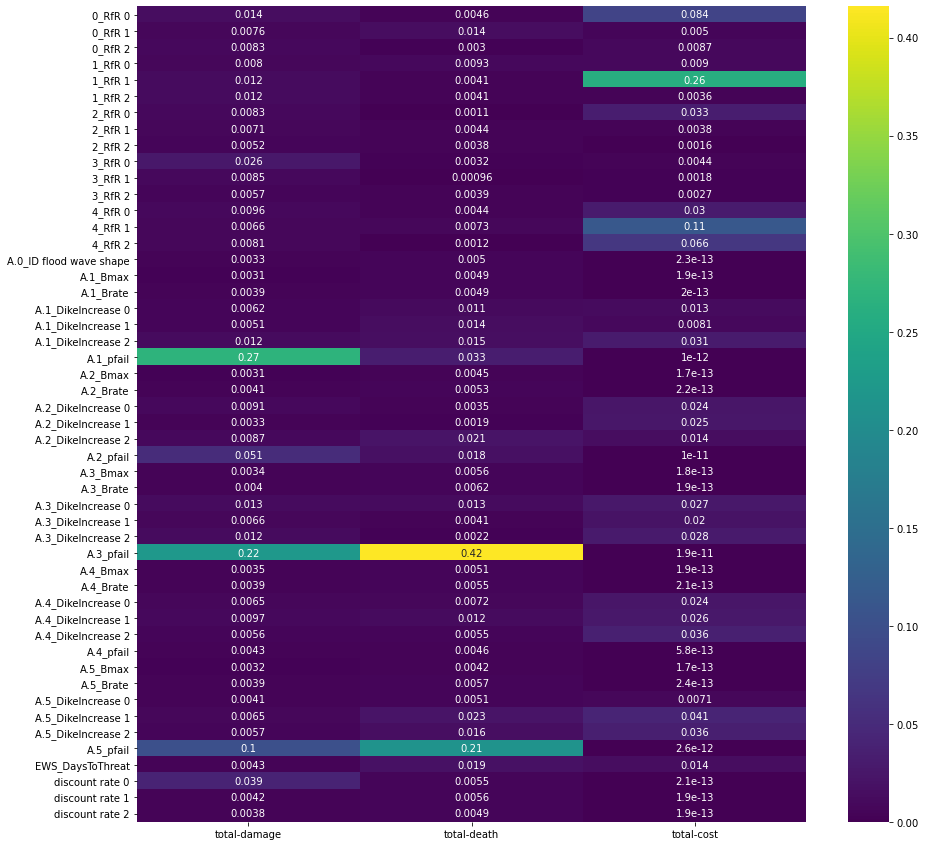

In [33]:
fs_r10 = feature_scoring.get_feature_scores_all(x_r10, data_r10)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(fs_r10, cmap='viridis', annot=True)
plt.show()

### Sobol analysis

In [34]:
dike_model, planning_steps = problem_definition('all vars')
policies_0 = [Policy('no policy', **{l.name: 0 for l in dike_model.levers})]

n_scen = 2500
print(n_scen)
with MultiprocessingEvaluator(dike_model) as evalu:
    sa_results = evalu.perform_experiments(n_scen, policies=policies_0, uncertainty_sampling='sobol', reporting_interval=400)

from ema_workbench import save_results
save_results(sa_results, './sobolnopol4000scen.tar.gz')
# cant get this to run so i am running sobol.py

2500


[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


AttributeError: 'NoneType' object has no attribute 'sample'

In [70]:
all_results_sobol = load_results('./data/exp/sobolnopol40000scen.tar.gz')
experiments_sobol, outcomes_sobol = all_results_sobol

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/sobolnopol40000scen.tar.gz


In [71]:
data_r10 = pd.DataFrame.from_dict(outcomes_sobol)
dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Investment').columns
data_r10.drop(columns=invest_list, inplace=True)
rfr_list = data_r10.filter(like='RfR').columns
data_r10.drop(columns=rfr_list, inplace=True)
evac_list = data_r10.filter(like='Evacuation').columns
data_r10.drop(columns=evac_list, inplace=True)

In [72]:
problem = get_SALib_problem(dike_model.uncertainties)
Si_damage = sobol.analyze(problem, np.array(data_r10['total-damage']),
                   calc_second_order=True, print_to_console=False)
Si_death = sobol.analyze(problem, np.array(data_r10['total-death']),
                   calc_second_order=True, print_to_console=False)

In [73]:
Si_damage_filter = {k:Si_damage[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_damage_df = pd.DataFrame(Si_damage_filter, index = problem['names'])
# Si_damage_df

Si_death_filter = {k:Si_death[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_death_df = pd.DataFrame(Si_death_filter, index = problem['names'])

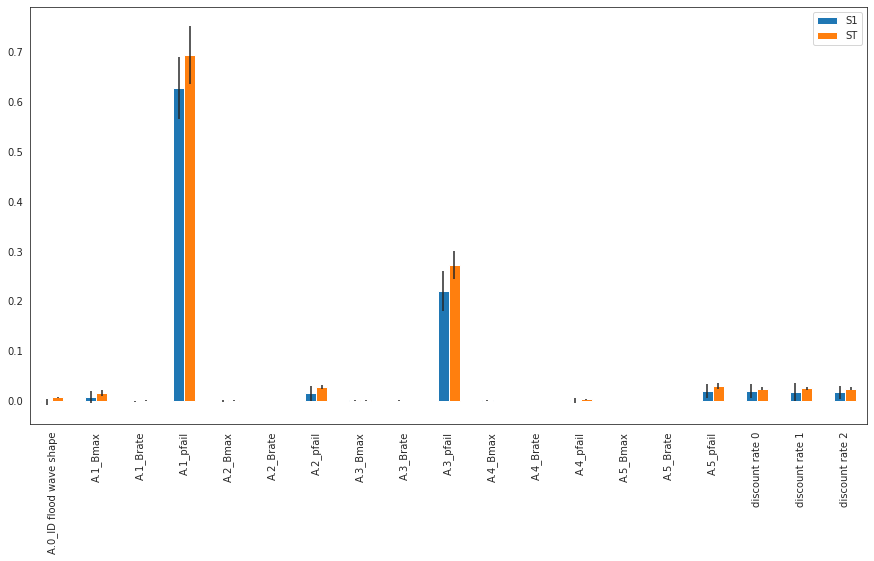

In [74]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_damage_df[['S1','ST']]
err = Si_damage_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

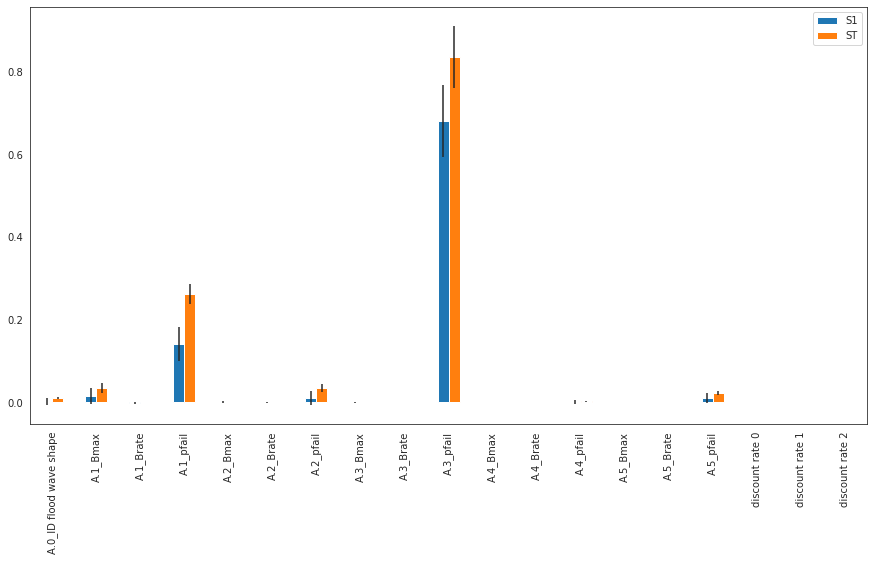

In [75]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_death_df[['S1','ST']]
err = Si_death_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [85]:
all_results_sobol_pol = load_results('./data/exp/sobolpol40000scen.tar.gz')
experiments_sobol_pol, outcomes_sobol_pol = all_results_sobol_pol

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/sobolpol40000scen.tar.gz


In [86]:
data_r10 = pd.DataFrame.from_dict(outcomes_sobol_pol)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Costs').columns
data_r10['total-cost'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)


In [87]:
levers = []
for lever in dike_model.levers:
    levers.append(lever)

In [88]:
# I know why this does not work; sobol requires an x amount of scenarios; thus differences in levers which it does not have here. Getting that sufficient is not yet possible for me. 
problem = get_SALib_problem(levers)
Si_damage = sobol.analyze(problem, np.array(data_r10['total-damage']),
                   calc_second_order=True, print_to_console=False)
Si_death = sobol.analyze(problem, np.array(data_r10['total-death']),
                   calc_second_order=True, print_to_console=False)
Si_cost = sobol.analyze(problem, np.array(data_r10['total-cost']),
                   calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [82]:
Si_damage_filter = {k:Si_damage[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_damage_df = pd.DataFrame(Si_damage_filter, index = problem['names'])
# Si_damage_df

Si_death_filter = {k:Si_death[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_death_df = pd.DataFrame(Si_death_filter, index = problem['names'])

Si_cost_filter = {k:Si_cost[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_cost_df = pd.DataFrame(Si_cost_filter, index = problem['names'])

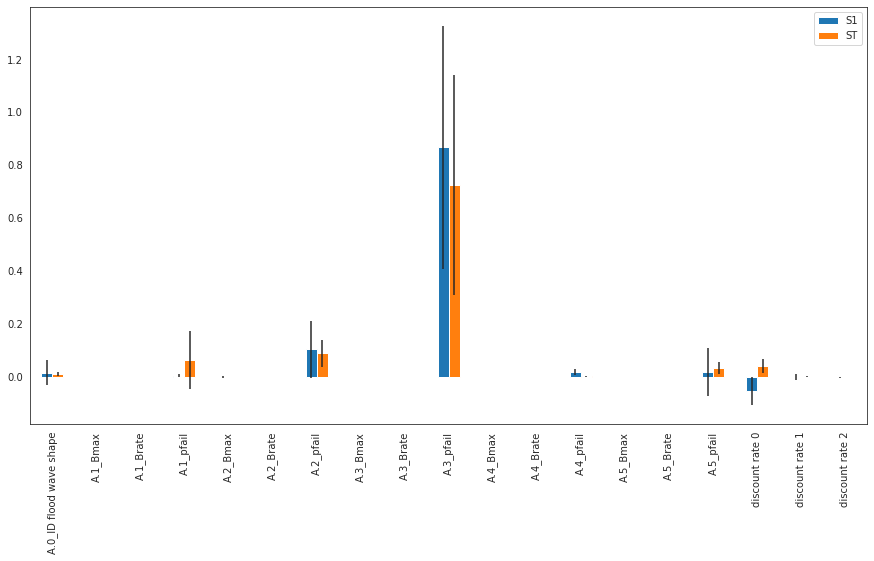

In [83]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_damage_df[['S1','ST']]
err = Si_damage_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

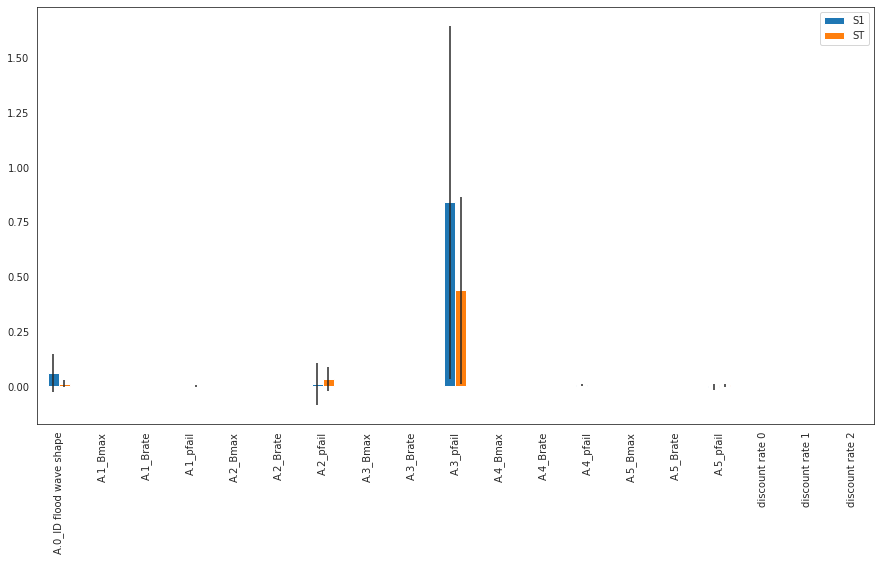

In [84]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_death_df[['S1','ST']]
err = Si_death_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_cost_df[['S1','ST']]
err = Si_cost_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()